# Intervallo di confidenza {#sec-confidence-interval}

**Prerequisiti**

**Concetti e competenze chiave**

**Preparazione del Notebook**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import arviz as az
import seaborn as sns
import pymc as pm

In [2]:
seed: int = sum(map(ord, "confidence_intervals"))
rng: np.random.Generator = np.random.default_rng(seed=seed)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

## Introduzione {.unnumbered}

Gli intervalli di confidenza sono un pilastro nell'approccio frequentista all'inferenza statistica, fornendo un mezzo per gestire l'incertezza associata ai risultati delle analisi statistiche. Questo capitolo si propone di esplorare in profondità gli intervalli di confidenza, analizzandone il calcolo e la loro interpretazione dal punto di vista frequentista. Sarà messa in luce la sfida nell'interpretare correttamente tali intervalli.

## Inferenza Statistica Frequentista: L'Intervallo di Confidenza

L'intervallo di confidenza è un concetto fondamentale nell'approccio frequentista alla statistica. Questo strumento è impiegato per valutare la variabilità della stima di un parametro di interesse all'interno di una popolazione, partendo da un campione di essa.

Al centro di questo metodo si trova l'errore standard, che misura la deviazione standard della distribuzione campionaria di uno stimatore. Questo indice quantifica quanto la stima del parametro si discosta, in media, dal valore effettivo del parametro nella popolazione. Gli statistici frequentisti sfruttano l'errore standard per definire l'intervallo di confidenza, che rappresenta un intervallo di valori entro cui si ritiene si trovi il vero valore del parametro, come ad esempio la media della popolazione.

Per comprendere l'intervallo di confidenza da una prospettiva frequentista è essenziale il concetto di "procedura di stima". In base a questo approccio, l'intervallo di confidenza viene costruito in modo che, se la medesima procedura fosse ripetuta su diversi campioni della stessa popolazione, una determinata percentuale degli intervalli di confidenza (ad esempio, il 95%) includerebbe il vero valore del parametro della popolazione.

In terminologia frequentista, quindi, non si afferma che un dato intervallo di confidenza possieda una probabilità del 95% di contenere il vero valore del parametro. Piuttosto, si sostiene che, seguendo lo stesso metodo di stima, il 95% degli intervalli di confidenza derivati da campioni differenti racchiuderebbe il vero valore del parametro.

In questo quadro, l'intervallo di confidenza non è una dichiarazione sulla probabilità che un particolare intervallo includa il valore del parametro, ma piuttosto un'affermazione sulla regolarità con cui gli intervalli calcolati in un determinato modo riescono a catturare il valore del parametro quando si ripete il medesimo processo su vari campioni. Questa distinzione è cruciale per una corretta comprensione dell'approccio frequentista all'inferenza statistica.

Mentre quest'interpretazione dell'intervallo di confidenza può apparire controintuitiva e talvolta poco pratica, riflette il contrasto con l'approccio bayesiano, il quale enfatizza l'aggiornamento delle probabilità sulla base di nuove informazioni, a differenza dell'approccio frequentista, che si basa sulla ripetizione degli esperimenti e sulla valutazione della variabilità campionaria.

## Determinazione dell'intervallo di Confidenza per una Media

Nei casi in cui la distribuzione delle statistiche campionarie si avvicina a una distribuzione Normale, l'intervallo di confidenza al 95% è calcolato come:

$$
\hat{\theta} \pm 1.96 \cdot \text{SE},
$$

dove $\hat{\theta}$ rappresenta la stima del parametro e SE l'errore standard.

### Derivazione dell'Intervallo di Confidenza per una Popolazione Normale con Varianza Nota

Consideriamo una popolazione che segue una distribuzione normale con una media nota $\mu$ e varianza $\sigma^2$. Prendiamo un campione casuale di dimensione $n$ da questa popolazione, indicato come $X_1, X_2, \dots, X_n$. Grazie alle proprietà delle distribuzioni normali, la media campionaria $\bar{X}$ segue anch'essa una distribuzione normale, nello specifico $\bar{X} \sim \mathcal{N}(\mu, \sigma^2/n)$.

#### Passo 1: Standardizzazione della Media Campionaria

- Per standardizzare la media campionaria in una variabile distribuita normalmente standard, sottraiamo la media della popolazione $\mu$ e dividiamo per lo scarto standard della media campionaria $\sigma/\sqrt{n}$. Ciò porta alla seguente trasformazione:
  
  $$
  Z = \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \sim \mathcal{N}(0, 1).
  $$

#### Passo 2: Stabilire il Livello di Confidenza

- Definiamo un livello di confidenza $\gamma = 1 - \alpha$, ad esempio $\gamma = 0.95$ per un livello di confidenza del 95%.
- Identifichiamo il valore critico $z$, corrispondente al quantile $(1 - \alpha/2)$ della distribuzione normale standard. Il valore $z$ rappresenta il punto di taglio alle estremità della distribuzione:
  
  $$
  P(-z \leq Z \leq z) = \gamma.
  $$

#### Passo 3: Formulazione dell'Intervallo di Confidenza

- Con il valore $z$ definito, formuliamo l'intervallo di confidenza per la media della popolazione:
  
  $$
  P\left(-z \leq \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \leq z\right) = \gamma.
  $$

#### Passo 4: Manipolazione Algebrica per Definire i Limiti

- Rielaboriamo la disuguaglianza per esporre i limiti dell'intervallo di confidenza:
  
  $$
  \begin{align}
  P\bigg(-z \leq &\frac{ \bar{X} - \mu } {\sigma} \sqrt{n} \leq z\bigg) = \gamma\notag\\
  P\bigg(-z {\frac{\sigma}{\sqrt{n}}} \leq  &\bar{X} - \mu \leq z \frac{\sigma}{\sqrt{n}}\bigg) = \gamma\notag\\
  P\bigg(-\bar{X}-z {\frac{\sigma}{\sqrt{n}}} \leq &-\mu \leq -\bar{X} + z \frac{\sigma}{\sqrt{n}}\bigg) = \gamma\notag\\
  P\bigg(\bar{X}+z \frac{\sigma}{\sqrt{n}} \geq &\mu \geq  \bar{X} -z \frac{\sigma}{\sqrt{n}}\bigg) = \gamma.\notag
  \end{align}
  $$   

#### Passo 5: Specificazione dei Limiti dell'Intervallo

- Definiamo i limiti dell'intervallo di confidenza, $\hat{a}$ e $\hat{b}$, come segue:
  
  $$
  \hat{a} = \bar{X} - z \frac{\sigma}{\sqrt{n}}, 
  \quad \hat{b} = \bar{X} + z \frac{\sigma}{\sqrt{n}},
  $$
  
  con $P(\hat{a} \leq \mu \leq \hat{b}) = \gamma$.

#### Conclusione: 

- L'intervallo di confidenza $(\hat{a}, \hat{b})$ racchiude il vero valore della media della popolazione $\mu$ con una probabilità $\gamma$.


### Stima dell'Intervallo di Confidenza per Popolazioni Normali con Varianza Incognita

In contesti reali, quando si preleva un campione $X_1, \dots, X_n$ da una popolazione, la varianza $\sigma^2$ della popolazione è spesso incognita. Questo aggiunge incertezza riguardo alla media della popolazione $\mu$, che è il parametro di interesse. In questi casi, si adotta la distribuzione t di Student per la stima dell'intervallo di confidenza della media $\mu$, a causa della varianza incognita.

#### Passo 1: Impiego della Distribuzione t di Student

- Applichiamo la formula seguente per calcolare l'intervallo:
  
  $$
  P\left(−t^{\ast} \leq \frac{\bar{X} - \mu}{s/\sqrt{n}} \leq t^{\ast}\right) = \gamma,
  $$
  
  dove $\gamma = 1 - \alpha$ è il livello di confidenza, $s$ è la stima della deviazione standard $\sigma$ della popolazione, e $t^{\ast}$ è il quantile di ordine $1 - \alpha/2$ della distribuzione t con $n−1$ gradi di libertà. 

#### Passo 2: Determinazione dei Limiti dell'Intervallo di Confidenza

- Calcoliamo i limiti inferiore $\hat{a}$ e superiore $\hat{b}$ dell'intervallo di confidenza così:
  
  $$
  \hat{a} = \bar{X} - t^{\ast} \frac{s}{\sqrt{n}},
  \quad \hat{b} = \bar{X} + t^{\ast} \frac{s}{\sqrt{n}}.
  $$

In queste circostanze, si sostituisce la varianza sconosciuta $\sigma^2$ con la sua stima $s$ e si utilizza la distribuzione t di Student invece della normale.

Applicabilità e Limitazioni:

- Il metodo presuppone che la popolazione segua una distribuzione normale e è valido anche per campioni di piccole dimensioni (ad esempio, $n < 30$) prelevati da tale popolazione.
- Se la popolazione non è normalmente distribuita e la dimensione del campione è ridotta, questo metodo potrebbe non essere idoneo.
- Tuttavia, per campioni di grandi dimensioni ($n \geq 30$), questo approccio rimane valido per la stima dell'intervallo di confidenza grazie al teorema del limite centrale, che si applica anche a popolazioni con distribuzioni non normali.

## Livello di Copertura

Per interpretare correttamente gli intervalli di fiducia è fondamentale considerare il concetto di "livello di copertura". Questo livello indica la frequenza con cui l'intervallo di fiducia include il valore reale del parametro della popolazione, in una serie di esperimenti ripetuti. 

Esempio di Livello di Copertura:
- Se il livello di copertura è del 95%, significa che, nel lungo periodo, il 95% degli intervalli di fiducia costruiti conterrà il valore vero del parametro. 
- Importante: Questo non implica che ci sia una probabilità del 95% che il valore vero del parametro cada in un particolare intervallo di fiducia. Infatti, il parametro della popolazione è un valore fisso e non soggetto a probabilità; piuttosto, l'incertezza risiede nell'intervallo di fiducia stesso.

Come Funziona la Copertura:
- Nel contesto frequentista, la "probabilità" si riferisce alla frequenza a lungo termine di un certo evento in un gran numero di ripetizioni dell'esperimento. 
- Nel caso degli intervalli di fiducia, l'"esperimento" è l'estrazione di un campione dalla popolazione, e l'"evento" è la generazione di un intervallo di fiducia che contiene il valore vero del parametro.
- Il livello di copertura, generalmente indicato come $1-\alpha$, rappresenta la probabilità a lungo termine che intervalli di fiducia costruiti con questa metodologia includano il vero valore del parametro.

### Simulazione

- Per illustrare questo concetto, eseguiamo una simulazione con la popolazione degli adulti maschi italiani, assunta come normalmente distribuita con media 175 cm e varianza 49 cm². 
- Eseguiamo 1000 ripetizioni di un esperimento, estraendo ogni volta un campione di 30 individui. 
- Per ciascun campione, calcoliamo l'intervallo di fiducia al 95% usando la formula:
  
  $$
  \bar{X} \pm t \frac{s}{\sqrt{n}},
  $$
  
  dove $\bar{X}$ è la media campionaria, $s$ è la deviazione standard campionaria e $t$ è il valore critico della distribuzione t-Student per $n-1$ gradi di libertà al livello di significatività $\alpha/2 = 0.025$.
- Registriamo i limiti di ciascun intervallo e controlliamo quanti di essi includono effettivamente il vero valore medio della popolazione.

Attraverso questa simulazione, possiamo visualizzare concretamente il concetto di livello di copertura e la sua importanza nella statistica frequentista.

Iniziamo generando 1000 campioni casuali di dimensione $n=30$ da una distribuzione normale con media $175$ e deviazione standard $7$.

In [5]:
mu = 175
sigma = 7
n = 30
n_samples = 1000

samples = np.stack([np.random.normal(loc=mu, scale=sigma, size=n) for i in range(n_samples)])
samples.shape

(1000, 30)

Il primo campione di ampiezza $n$ = 30 che abbiamo ottenuto è il seguente.

In [6]:
print(samples[1, :])

[164.73077142 178.36458698 178.37872685 174.13939428 171.93750167
 183.62660835 166.47855379 166.14290722 190.11028319 178.59315899
 171.1696638  173.70591366 170.78474733 175.70917764 168.69153018
 177.18965061 184.68306022 180.57048893 182.54977759 179.74984648
 167.07981468 185.24317632 176.86968895 177.70411011 171.09097822
 166.88189761 176.52572538 175.31383448 173.88320882 169.05527411]


Stampiamo qui di seguito le medie dei primi dieci campioni.

In [7]:
xbar = samples.mean(axis=1)
print(xbar[0:10])

[176.37407572 175.23180193 174.58152045 176.40365999 176.74312635
 174.17121749 174.48572499 174.18025492 175.07399899 176.36952714]


Troviamo il valore critico della distribuzione $t$ di Student con (30-1) gradi di libertà.

In [8]:
alpha = 0.05
t = st.t.ppf(1 - alpha/2, n-1)
t

2.0452296421327034

Utilizzando le informazioni precedenti, calcoliamo 1000 intervalli di confidenza per la media della popolazione.

In [9]:
interval_width = t * samples.std(axis=1, ddof=1) / np.sqrt(n)
CI_low = samples.mean(axis=1) - interval_width
CI_high = samples.mean(axis=1) + interval_width

Troviamo ora il livello di copertura, ovvero il numero di volte in cui l'intervallo di confidenza calcolato contiene il vero valore del parametro.

In [10]:
coverage_p = np.sum(np.logical_and(CI_low < mu, mu < CI_high)) / samples.shape[0]
coverage_p

0.958

In conclusione, ripetendo la simulazione per 1000 volte, abbiamo ottenuto una proporzione di intervalli di confidenza del 95% che contengono il parametro (ovvero il livello di copertura) molto vicino al valore nominale di $1 - \alpha = 0.95$.


### Il Concetto di Livello di Confidenza
Gli intervalli di confidenza sono range di valori che, con una certa sicurezza statistica, si ritiene includano il parametro di interesse. 

Secondo l'approccio frequentista, l'intervallo di confidenza si deve considerare come una metodologia:
- Se ripetiamo l'esperimento (estrarre un campione e calcolare l'intervallo di confidenza) molte volte, il metodo produce un intervallo che coprirà il valore vero del parametro nel 95% dei casi, assumendo un livello di confidenza del 95%.

### Un Malinteso Comune nell'Interpretazione degli Intervalli di Confidenza

È inesatto affermare che un determinato intervallo di confidenza contenga il valore vero di un parametro con una probabilità del 95%. Questo è un errore diffuso, persino tra i ricercatori, che spesso interpretano l'intervallo di confidenza come indicativo della probabilità che il parametro (ad esempio, la media della popolazione $\mu$) si trovi effettivamente all'interno di un dato intervallo (es. $[\hat{a}, \hat{b}]$).

La descrizione corretta è la seguente:
- "La metodologia impiegata per calcolare l'intervallo $[\hat{a}, \hat{b}]$ ha il 95% di probabilità di generare un intervallo che include il vero valore del parametro".
- Ciò significa che l'intervallo di confidenza non esprime una probabilità circa la posizione precisa del parametro, ma riflette la probabilità che la procedura adottata per determinarlo generi un intervallo che lo includa.

In conclusione, l'intervallo di confidenza ci fornisce una garanzia statistica riguardo alla affidabilità del metodo usato per la sua stima, piuttosto che sulla esatta ubicazione del parametro in questione.

### Fraintendimenti Comuni sugli Intervalli di Confidenza

Nel loro lavoro, {cite}`hoekstra2014robust` evidenziano come, nonostante l'ampio riconoscimento dei limiti dei test di ipotesi nulle, gli intervalli di confidenza siano spesso consigliati per l'inferenza statistica. Anche l'American Psychological Association (APA) suggerisce che gli intervalli di confidenza siano "in generale, la migliore strategia di reportistica". Tuttavia, {cite}`hoekstra2014robust` sottolineano che queste raccomandazioni non considerano la difficoltà nel fornire una corretta interpretazione degli intervalli di confidenza.

Per indagare l'interpretazione degli intervalli di confidenza, Hoekstra et al. hanno condotto uno studio con due domande principali:

1. Quanto frequentemente intervalli di confidenza sono mal interpretati da studenti e ricercatori?
2. L'esperienza nella ricerca riduce le interpretazioni errate degli intervalli di confidenza?

Prima di presentare lo studio, {cite}`hoekstra2014robust` ricordano qual è l'interpretazione corretta degli intervalli di confidenza. 

> A CI is a numerical interval constructed around the estimate of a parameter. Such an interval does not, however, directly indicate a property of the parameter; instead, it indicates a property of the procedure, as is typical for a frequentist technique. Specifically, we may find that a particular procedure, when used repeatedly across a series of hypothetical data sets (i.e., the sample space), yields intervals that contain the true parameter value in 95% of the cases. When such a procedure is applied to a particular data set, the resulting interval is said to be a 95% CI. The key point is that the CIs do not provide for a statement about the parameter as it relates to the particular sample at hand; instead, they provide for a statement about the performance of the procedure of drawing such intervals in repeated use. Hence, it is incorrect to interpret a CI as the probability that the true value is within the interval (e.g., Berger & Wolpert, 1988). As is the case with $p$-values, CIs do not allow one to make probability statements about parameters or hypotheses.

Nel loro studio, {cite:t}`hoekstra2014robust` hanno presentato un questionario a 596 partecipanti, tra cui studenti universitari e ricercatori, con le seguenti affermazioni riguardanti l'interpretazione degli intervalli di confidenza.

> Professor Bumbledorf conducts an experiment, analyzes the data, and reports: "The 95% confidence interval for the mean ranges from 0.1 to 0.4." Please mark each of the statements below as 'true' or 'false'.

> 1.  The probability that the true mean is greater than 0 is at least 95%.
> 2.  The probability that the true mean equals 0 is smaller than 5%.
> 3.  The "null hypothesis" that the true mean equals 0 is likely to be incorrect.
> 4.  There is a 95% probability that the true mean lies between 0.1 and 0.4.
> 5.  We can be 95% confident that the true mean lies between 0.1 and 0.4.
> 6.  If we were to repeat the experiment over and over, then 95% of the time the true mean falls between 0.1 and 0.4.

Sorprendentemente, anche se tutte le sei affermazioni nel questionario sono errate, molti partecipanti hanno concordato con esse. I risultati mostrano che, in media, i partecipanti hanno concordato con circa 3.5 affermazioni errate su 6. Non è stata rilevata una differenza di rilievo nell'interpretazione degli intervalli di confidenza tra studenti e ricercatori, suggerendo che l'esperienza nella ricerca non migliora la comprensione di questo concetto.

I risultati indicano che molte persone interpretano erroneamente gli intervalli di confidenza, e che anche l'esperienza nella ricerca non garantisce una migliore comprensione. Questo solleva dubbi sull'efficacia degli intervalli di confidenza frequentisti e suggerisce che gli "intervalli di credibilità" bayesiani possano rappresentare un'alternativa più vantaggiosa. Quest'ultimi tendono ad essere più intuitivi e di più facile interpretazione corretta.

## Confronto tra Intervalli Frequentisti e Bayesiani

Concludiamo questo capitolo esaminando le differenze tra l'intervallo di confidenza frequentista e l'intervallo di credibilità bayesiano, utilizzando lo stesso set di dati per entrambi i calcoli.

Immaginiamo di avere un gruppo di 20 osservazioni relative alla performance in un test cognitivo. Il nostro obiettivo è stimare la media della popolazione da cui sono state tratte queste osservazioni. Per farlo, simuliamo 20 valori casuali da una popolazione che segue una distribuzione normale con media 50 e deviazione standard 10, rappresentata da $\mathcal{N}(50, 10)$.

In [11]:
sample_size = 20
mu = 50
sigma = 10
sample_data = np.random.normal(loc=mu, scale=sigma, size=n)
print(sample_data)

[40.13038118 67.14138507 58.15372819 61.87080597 70.28823876 58.64307551
 55.41941724 67.9643939  42.76867878 58.37573589 51.38804991 46.78454195
 36.63322195 44.69934389 56.11884628 40.82879678 45.90438324 45.45382291
 40.89898539 49.55213524 64.12932274 50.47661058 53.19291531 52.46171204
 47.98108743 41.26631945 66.63886733 58.25433261 50.31265781 60.7856227 ]


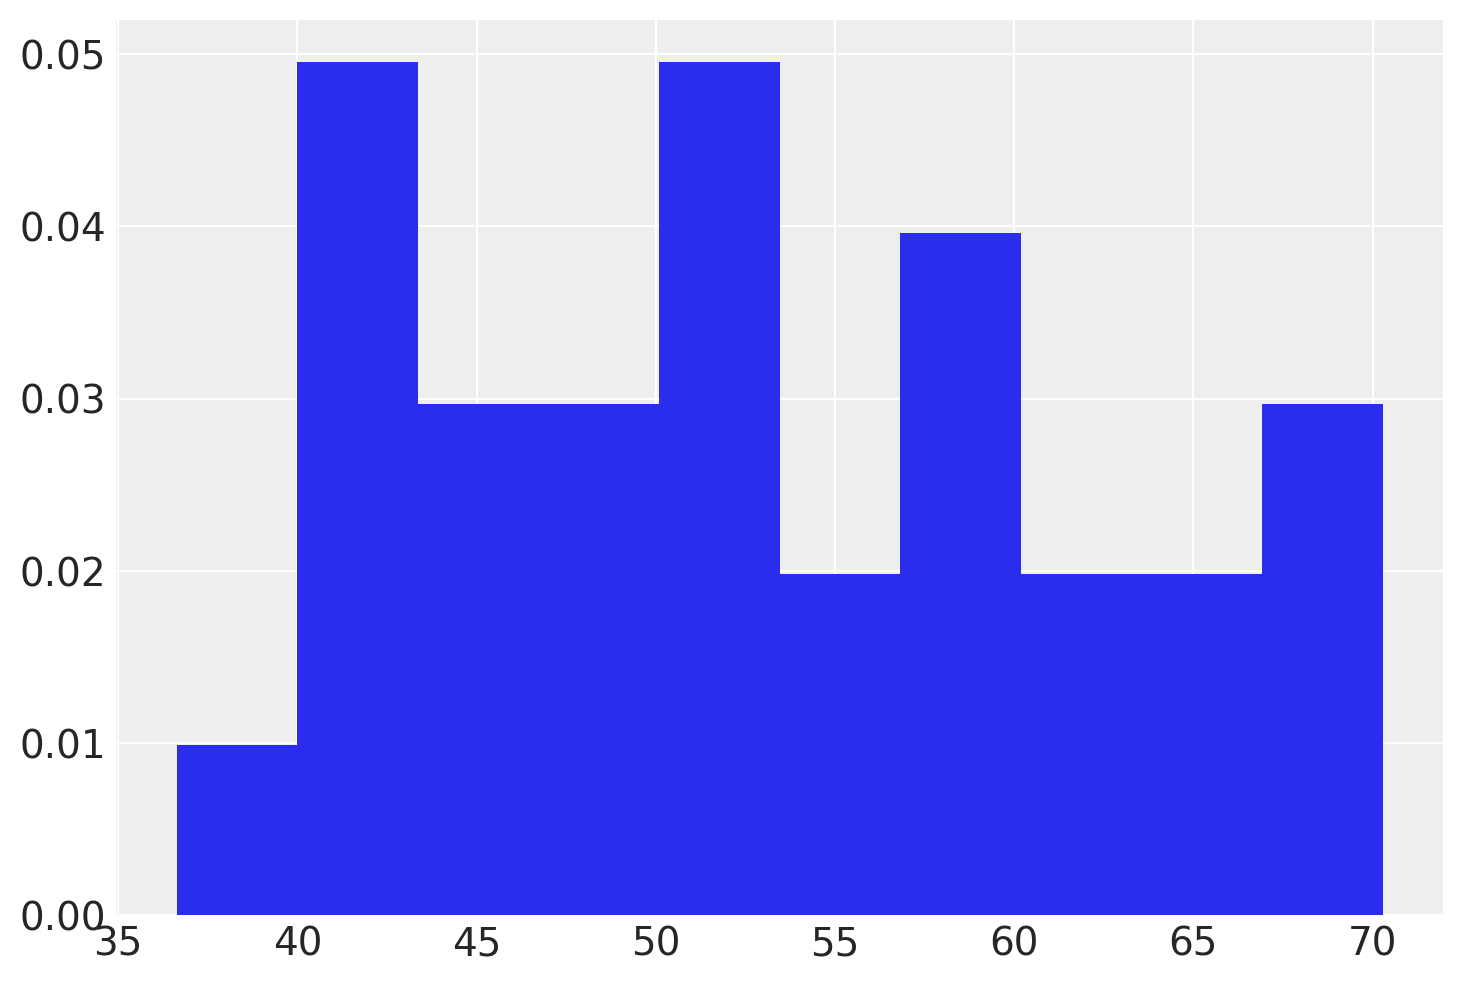

In [12]:
_ = plt.hist(sample_data, density=True)

### Intervallo di Confidenza Frequentista

Quando ci si avvicina al problema di stimare la media della popolazione, $\mu$, attraverso un approccio frequentista, uno dei metodi più comuni è la stima puntuale. Questo metodo consiste nell'utilizzare un unico valore, solitamente la media del campione, per rappresentare il parametro della popolazione che non conosciamo.

La media campionaria, indicata come $\hat{\mu}$, è una scelta frequente per la stima puntuale della media della popolazione, $\mu$. Si calcola sommando tutti i valori osservati nel campione, ovvero $X_1, X_2, ..., X_n$, e dividendo questa somma per il numero totale di osservazioni nel campione, $n$:

$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^n X_i.
$$

Applicando questa formula ai dati del nostro esempio, otteniamo

In [13]:
sample_mean = np.mean(sample_data)
sample_mean

52.81724720110726

Mentre le stime puntuali offrono un valore specifico per rappresentare il parametro della popolazione, non riescono da sole a descrivere completamente l'incertezza associata a questa stima. Per affrontare questa lacuna, l'approccio frequentista si avvale degli intervalli di confidenza. Un intervallo di confidenza fornisce una gamma di valori all'interno dei quali si presume che il vero parametro della popolazione cada, basandosi sui dati osservati. Questo intervallo viene definito aggiungendo e sottraendo un margine di errore alla stima puntuale:

$$\hat{\mu} \pm m = [\hat{\mu} - m, \hat{\mu} + m].$$

Il margine di errore, che riflette la variabilità dei dati del campione, dipende sia dal livello di confidenza scelto, indicato come $1-\alpha$, sia dalla dimensione del campione, $n$. Ad esempio, un intervallo di confidenza del 95% significa che ci si aspetta che l'intervallo includa il vero parametro della popolazione nel 95% delle applicazioni di questa procedura.

Il margine di errore si calcola normalmente attraverso l'errore standard (SE) della stima puntuale, e viene definito da:

$$m = t_{1-\frac{\alpha}{2}, n-1} \times SE,$$

dove $t_{1-\frac{\alpha}{2}, n-1}$ rappresenta il valore critico dalla distribuzione t per il livello di confidenza desiderato e $n-1$ gradi di libertà.

L'errore standard della media campionaria si ottiene dividendo la deviazione standard del campione, $\sigma$, per la radice quadrata della dimensione del campione:

$$SE = \frac{\sigma}{\sqrt{n}}.$$

Applicando questa formula ai dati del nostro esempio, la deviazione standard del campione risulta

In [14]:
sample_stddev = np.std(sample_data, ddof=1)
sample_stddev

9.359341680068068

L'errore standard della media è

In [15]:
standard_error = sample_stddev / np.sqrt(sample_size)
print(standard_error)

2.092812422127929


L'errore standard della media rappresenta una stima della deviazione standard della distribuzione delle medie campionarie per campioni di dimensione $n$ (in questo caso, $n$ = 20).

Supponiamo di voler avere un livello di confidenza del 95%. Per trovare il valore critico della distribuzione $t$ di Student, dobbiamo trovare il valore della statistica $T$ che lascia il 2.5% dell'area sotto la coda a sinistra e il 2.5% dell'area sotto la coda a destra della distribuzione $t$ di Student con 19 gradi di libertà.

In [16]:
degrees_of_freedom = sample_size - 1
t_val = st.t.ppf(0.975, degrees_of_freedom)
print(t_val)

2.093024054408263


Il margine d'errore è uguale a 

$$t \cdot SE$$

ovvero

In [17]:
margin_of_error = t_val * standard_error
print(margin_of_error)

4.380306740878175


L'intervallo di confidenza frequentista è uguale a 

$$\text{stima del parametro} \pm \text{margine d'errore}$$

ovvero

$$\bar{x} \pm t_{\text{critico}} \frac{s}{\sqrt{n}}.$$

Per i dati dell'esempio otteniamo

In [18]:
confidence_interval_lower = sample_mean - margin_of_error
confidence_interval_upper = sample_mean + margin_of_error
confidence_interval = [confidence_interval_lower, confidence_interval_upper]
print(confidence_interval)

[48.43694046022908, 57.19755394198543]


Interpretiamo questo risultato dicendo che la procedura utilizzata per calcolare l'intervallo $[42.99, 53.23]$ include $\mu$ nel 95% dei casi.

La figura successiva mostra la distribuzione dei dati, la stima di $\mu$ (ovvero, la media del campione) e l'intervalli di confidenza al 95%.

In [20]:
def visualize_output(sample_data, sample_mean, interval, type_interval):
    plt.hist(sample_data, density=True, alpha=0.5)
    plt.axvline(x=sample_mean, linestyle='dashed', linewidth=2)
    plt.axvline(x=interval[0], linewidth=2)
    plt.axvline(x=interval[1], linewidth=2)
    plt.legend(['Sample Mean', f'{type_interval} interval'])

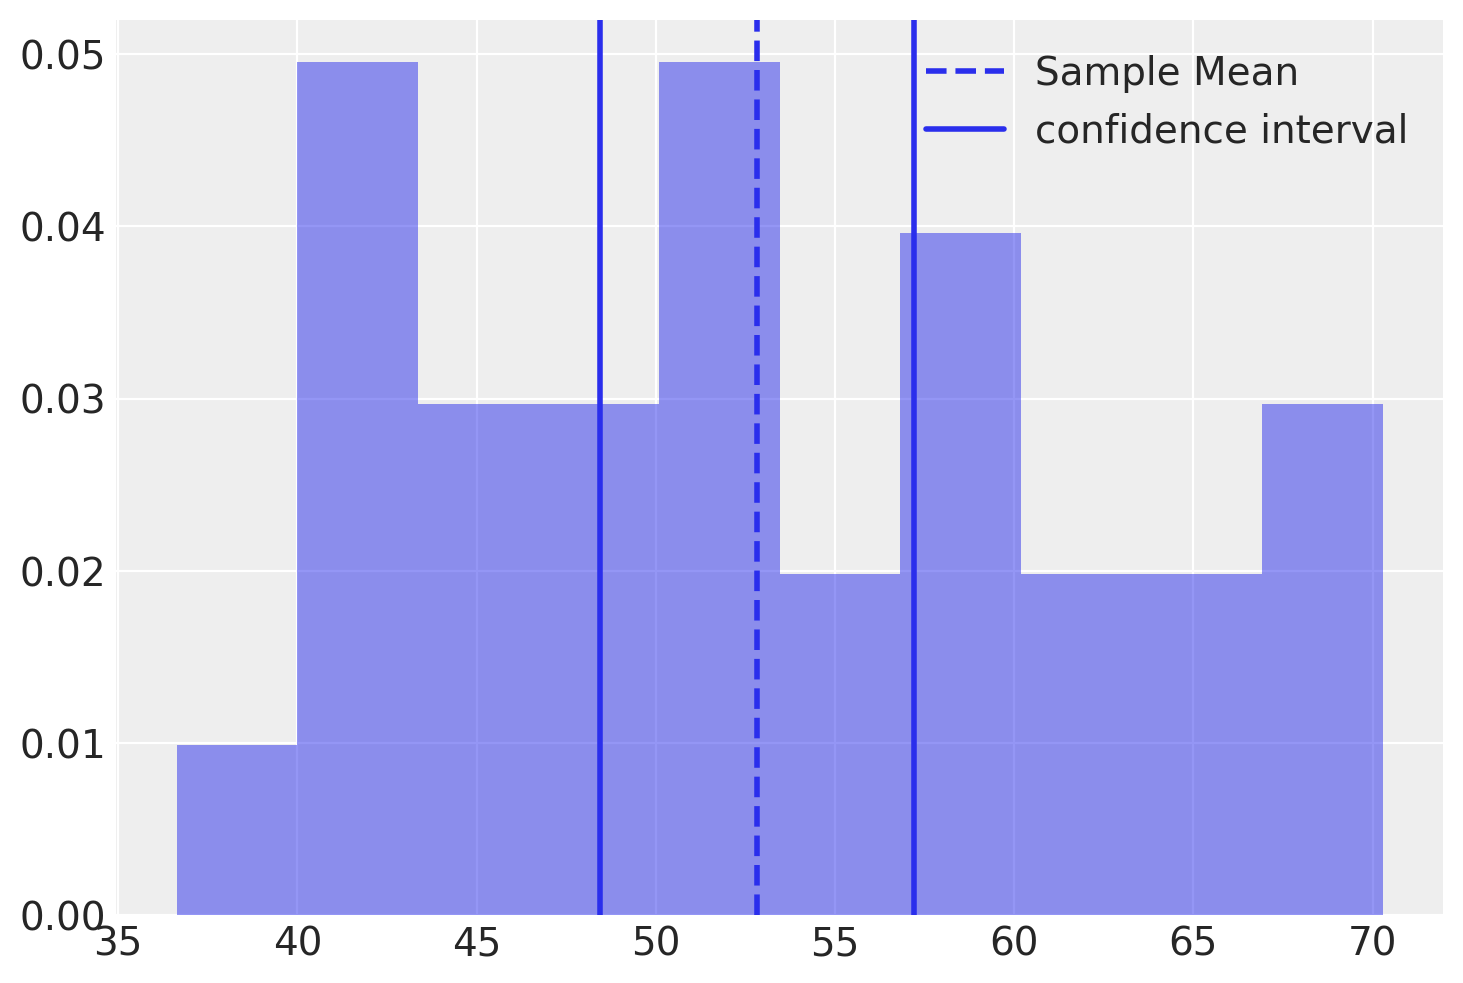

In [21]:
visualize_output(sample_data, sample_mean, confidence_interval, 'confidence')

### Intervallo di Credibilità Bayesiano

Per determinare l'intervallo di credibilità bayesiano, impieghiamo un modello statistico basato sulla distribuzione Normale, integrando distribuzioni a priori che forniscono informazioni iniziali limitate sui parametri. Questa strategia ci consente di inserire delle conoscenze preliminari, pur essendo vaghe, nell'analisi statistica.

Dettagli sulle scelte delle distribuzioni a priori:
- Per il parametro $\mu$, impostiamo una distribuzione a priori centrata intorno allo zero, con una deviazione standard piuttosto ampia. Come alternativa, si potrebbe considerare di centrare la distribuzione a priori sulla media campionaria.
- Per il parametro $\sigma$, adottiamo una distribuzione Normale troncata, posizionata anch'essa intorno allo zero, ma con una deviazione standard notevolmente grande.

La scelta di centrare le distribuzioni a priori sullo zero è volta a evitare l'introduzione di bias nell'analisi, tendendo verso una stima conservativa, ossia una stima del parametro incline allo zero. La decisione di usare deviazioni standard molto ampie riflette la debolezza delle informazioni preliminari che abbiamo incorporato nel modello.

Ciò detto, abbiamo introdotto alcune conoscenze iniziali nell'analisi: in particolare, l'assunzione che valori eccessivamente elevati, sia positivi che negativi, per la media del campione siano improbabili. Questa considerazione riflette una cautela nell'estimare il parametro, evitando di considerare valori estremi come plausibili.

In [22]:
model = pm.Model()

with model:
    mu = pm.Normal("mu", mu=0, sigma=200)
    sigma = pm.HalfNormal("sigma", 100)
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=sample_data)

In [23]:
with model:
    idata = pm.sample(nuts_sampler="numpyro")

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [24]:
az.summary(idata, hdi_prob=0.95, round_to=2)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,52.89,1.84,49.26,56.53,0.04,0.03,2432.99,2087.60,1.0
sigma,9.77,1.31,7.47,12.45,0.03,0.02,2652.84,2492.04,1.0


Si noti che, dati i dati specifici e la formulazione del modello bayesiano in uso, l'intervallo di credibilità ottenuto si mostra molto simile all'intervallo di confidenza calcolato secondo l'approccio frequentista. Tuttavia, l'interpretazione di questi due intervalli differisce in maniera sostanziale.

Nel caso dell'intervallo di credibilità bayesiano, possiamo affermare che, in base al nostro grado di credenza soggettiva del 95%, la media della popolazione si trova all'interno dell'intervallo specificato. Questo è un'affermazione diretta sulla probabilità che la media della popolazione rientri in un determinato intervallo, basata sulle informazioni priori e sui dati osservati.

In contrasto, l'intervallo di confidenza frequentista non permette un'interpretazione diretta riguardo alla probabilità della media della popolazione di cadere in un dato intervallo. Invece, l'interpretazione frequentista indica che, se ripetessimo il processo di campionamento molte volte, il 95% degli intervalli di confidenza calcolati conterrebbe la vera media della popolazione.

Quindi, mentre l'intervallo di credibilità bayesiano fornisce una misura diretta della credenza nella posizione della media della popolazione, l'intervallo di confidenza frequentista fornisce una misura di affidabilità del processo di stima nel lungo termine.

## Riflessioni Conclusive

Come sottolineato da {cite:t}`hoekstra2014robust`, è comune riscontrare fraintendimenti riguardo agli intervalli di fiducia. Il "livello di confidenza del 95%" è da interpretarsi come la probabilità a lungo termine che, in una serie di intervalli di fiducia calcolati, il 95% di essi includa il vero valore del parametro sconosciuto. Tuttavia, per un singolo intervallo di fiducia, non è possibile dichiarare con sicurezza che questo contenga effettivamente il parametro di interesse. In altre parole, la certezza sulla presenza del parametro sconosciuto all'interno di un dato intervallo di fiducia non è garantita per ogni singolo caso analizzato.

È inoltre inesatto presumere che esista un legame diretto tra la varianza e la media di un campione, ipotizzando che un intervallo di fiducia più ristretto implichi maggiore precisione. Nella prospettiva frequentista, la "precisione" è strettamente legata al livello di copertura a lungo termine assicurato dal metodo usato per creare gli intervalli di fiducia. Questo concetto non si applica al singolo intervallo di fiducia osservato. Dunque, un intervallo di fiducia che si presenta estremamente ristretto potrebbe in realtà essere significativamente lontano dal valore vero del parametro non noto.

È importante sottolineare che l'approccio frequentista offre un metodo per calcolare gli intervalli di confidenza per una vasta gamma di statistiche. Questo include, ad esempio, la stima dell'intervallo di confidenza per la differenza tra due medie, per una proporzione o per la differenza tra due proporzioni. Ecco le formule per calcolare gli intervalli di confidenza per i casi menzionati:

1. **Intervallo di confidenza per la differenza tra due medie**:
   
   Se abbiamo due campioni indipendenti di dimensione $ n_1 $ e $ n_2 $, con medie $ \bar{x}_1 $ e $ \bar{x}_2 $ e deviazioni standard $ s_1 $ e $ s_2 $, l'intervallo di confidenza per la differenza tra le medie è calcolato come:
   
   $$
   (\bar{x}_1 - \bar{x}_2) \pm t_{\alpha/2} \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}
   $$

   Dove $ t_{\alpha/2} $ è il valore critico della distribuzione t di Student con $ \alpha/2 $ di probabilità di coda e gradi di libertà $ df = n_1 + n_2 - 2 $.

2. **Intervallo di confidenza per una proporzione**:
   
   Per stimare l'intervallo di confidenza per una proporzione $ p $ in un campione binomiale di dimensione $ n $, la formula è:
   
   $$
   \hat{p} \pm z_{\alpha/2} \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}
   $$

   Dove $ \hat{p} $ è la proporzione campionaria e $ z_{\alpha/2} $ è il valore critico della distribuzione normale standard con $ \alpha/2 $ di probabilità di coda.

3. **Intervallo di confidenza per la differenza tra due proporzioni**:
   
   Per stimare l'intervallo di confidenza per la differenza tra due proporzioni $ p_1 $ e $ p_2 $ in due campioni binomiali di dimensioni $ n_1 $ e $ n_2 $, la formula è:
   
   $$
   (\hat{p}_1 - \hat{p}_2) \pm z_{\alpha/2} \sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}
   $$

   Dove $ \hat{p}_1 $ e $ \hat{p}_2 $ sono le proporzioni campionarie e $ z_{\alpha/2} $ è il valore critico della distribuzione normale standard con $ \alpha/2 $ di probabilità di coda.

## Informazioni sull'Ambiente di Sviluppo {.unnumbered}

In [25]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Sun May 12 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.22.2

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

seaborn   : 0.13.2
matplotlib: 3.8.4
arviz     : 0.18.0
numpy     : 1.26.4
scipy     : 1.13.0
pandas    : 2.2.2
pymc      : 5.14.0

Watermark: 2.4.3

